# Massachusetts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Mass_police_state_data = pd.read_excel('Per State Police Department Purchase Combined.xlsx', 'Massachusetts')

In [3]:
Mass_police_state_data.head()

,Police Department,Weapons Purchase Amount,Tactical Equipment Purchase Amount,Vehicle Purchase Amount,County
0,ACTON POLICE DEPT,828.0,0.0,0.0,Middlesex County
1,AUBURN POLICE DEPT,8624.1,0.0,0.0,Worcester County
2,BARNSTABLE POLICE DEPT,690.0,3366.0,0.0,Barnstable County
3,BELCHERTOWN POLICE DEPT,1996.0,0.0,0.0,Hampshire County
4,BERKSHIRE COUNTY SHERIFFS OFFICE,0.0,0.0,100355.0,Berkshire County


In [4]:
Mass_police_county_gb = Mass_police_state_data.groupby('County')

In [5]:
Mass_County_census_df = pd.read_csv('./State_County_Census/Mass_County_Census_Data.csv')

In [6]:
Mass_County_census_df

,County,Population Density,High School Completion Percent,Median Household Income,Second Language at Home (%),Foreign Born People Percent,Poverty Rate,Black (%),American Indian (%),Asian (%),Native Hawaiian (%),Some Other Race (%),Two or more Race (%),Hispanic (%),White (%),Weapons Purchase Amount,Tactical Equipment Purchase Amount,Vehicle Purchase Amount
0,Barnstable County,548.3,95.4,65382,7.8,6.9,8.2,1.9,0.6,1.1,0.0,1.5,2.2,2.2,91.4,6566.50,3366.00,127788.00
1,Berkshire County,141.6,90.6,52253,7.5,5.8,12.4,2.7,0.2,1.2,0.0,1.2,2.1,3.5,90.6,1977.00,0.00,100355.00
2,Bristol County,991.3,83.7,59343,20.7,12.3,12.5,3.3,0.4,1.9,0.0,3.4,2.6,6.0,85.6,41818.00,10816.05,2557860.12
3,Dukes County,160.2,92.8,63534,11.9,9.3,9.1,3.1,1.1,0.8,0.1,3.9,3.4,2.3,86.3,7761.00,0.00,218794.00
4,Essex County,1508.8,89.3,70886,25.1,15.8,11.3,3.8,0.4,3.1,0.0,8.2,2.6,16.5,76.0,42137.45,155781.07,1069404.00
5,Franklin County,102.1,92.8,56347,6.8,5.2,11.3,1.1,0.3,1.3,0.0,1.0,2.1,3.2,92.4,0.00,3138.94,74528.00
6,Hampden County,751.0,85.4,51005,25.5,9.0,17.6,9.0,0.4,2.0,0.1,9.2,2.9,20.9,67.7,14050.00,28828.62,215653.00
7,Hampshire County,299.8,94.3,62608,10.7,7.8,14.7,2.5,0.2,4.5,0.0,1.5,2.5,4.7,86.2,3717.55,0.00,223538.00
8,Middlesex County,1837.9,92.6,89019,25.4,20.0,8.2,4.7,0.2,9.3,0.0,3.3,2.5,6.5,76.5,55123.00,2279.79,364901.00
9,Nantucket County,226.2,94.7,89428,14.8,17.6,10.3,6.8,0.1,1.2,0.0,2.6,1.8,9.4,80.5,0.00,0.00,0.00


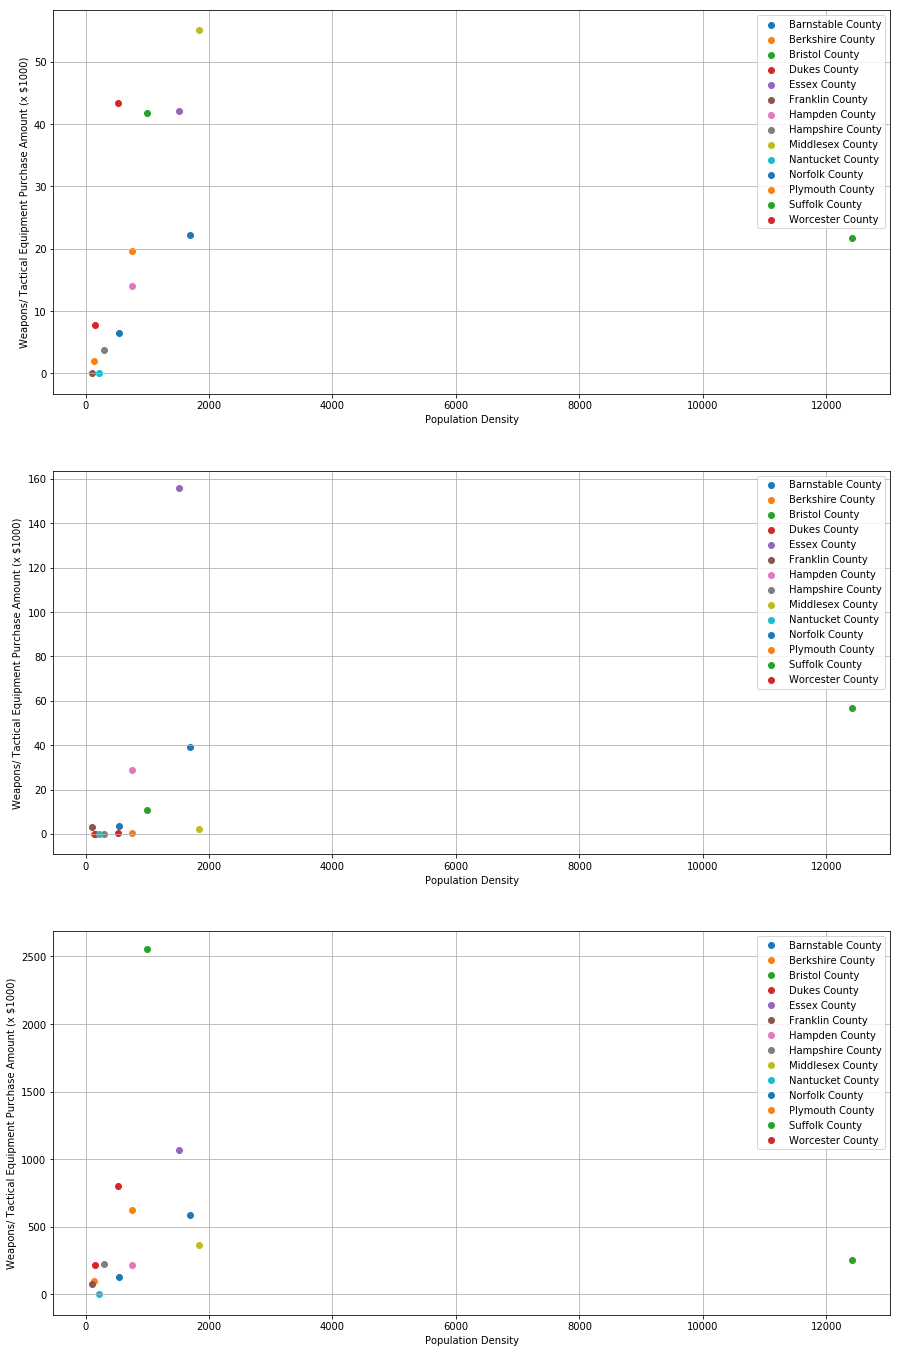

In [7]:
x_data_name = 'Population Density'
fig, ax = plt.subplots(3, 1, figsize=(15,24))
x_data = Mass_County_census_df[x_data_name]
y_weapons_data = np.array(Mass_County_census_df['Weapons Purchase Amount'])/1000
y_accessory_data = np.array(Mass_County_census_df['Tactical Equipment Purchase Amount'])/1000
y_vehicle_data = np.array(Mass_County_census_df['Vehicle Purchase Amount'])/1000

for x, y, c in zip(x_data, y_weapons_data, Mass_County_census_df['County']):
    ax[0].scatter(x, y, label = c)
    
#ax[0].set_xscale('log')
ax[0].set_xlabel(x_data_name)
ax[0].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[0].grid()
ax[0].legend()

for x, y, c in zip(x_data, y_accessory_data, Mass_County_census_df['County']):
    ax[1].scatter(x, y, label = c)
#ax[1].scatter(x_data, y_accessory_data, label = 'Tactical Equipment Total Purchase')
#ax[1].set_xscale('log')
ax[1].set_xlabel(x_data_name)
ax[1].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[1].grid()
ax[1].legend()

for x, y, c in zip(x_data, y_vehicle_data, Mass_County_census_df['County']):
    ax[2].scatter(x, y, label = c)
#ax[2].scatter(x_data, y_vehicle_data, label = 'Vehicle Total Purchase')
#ax[2].set_xscale('log')
ax[2].set_xlabel(x_data_name)
ax[2].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[2].grid()
ax[2].legend()

In [8]:
Masschusetts_timeline_purchase_data = pd.read_pickle('../Massachusetts.pkl')

In [9]:
county_police_timeline = []
for station in Masschusetts_timeline_purchase_data['Station Name (LEA)']:
    county_police = Mass_police_state_data[Mass_police_state_data['Police Department'] == station]['County']
    county_police_timeline.append(county_police.values[0])

In [10]:
Masschusetts_timeline_purchase_data.head()

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date
0,MA,ACTON POLICE DEPT,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1.0,2000-09-06
1,MA,ACTON POLICE DEPT,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1.0,2000-09-06
2,MA,ACTON POLICE DEPT,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1.0,2000-09-06
3,MA,ACTON POLICE DEPT,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1.0,2000-09-06
4,MA,ACTON POLICE DEPT,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1.0,2000-09-06


In [11]:
Masschusetts_timeline_purchase_data['County'] = county_police_timeline

In [12]:
Masschusetts_timeline_purchase_data_groupby = Masschusetts_timeline_purchase_data.groupby('County')

In [13]:
county_list = []
x_data = []
y_data = []
for county, county_purchase in Masschusetts_timeline_purchase_data_groupby:
    county_purchase = county_purchase.sort_values(by = 'Ship Date')
    county_list.append(county)
    x_data_temp = county_purchase['Ship Date']
    y_data_temp = county_purchase['Acquisition Value']
    x_data.append(x_data_temp)
    y_data.append(y_data_temp)

In [14]:
max_cost = max(np.cumsum(Masschusetts_timeline_purchase_data['Acquisition Value']))
len(county_list)

13

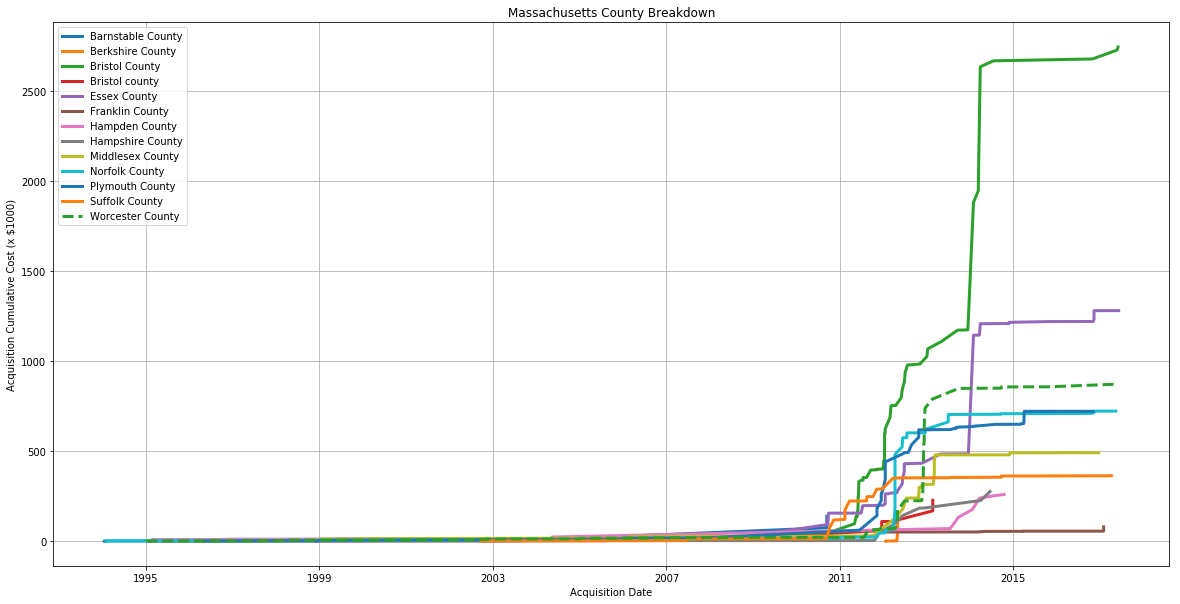

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x_data[0], np.cumsum(y_data[0])/1000, label = county_list[0], linewidth = 3)
ax.plot(x_data[1], np.cumsum(y_data[1])/1000, label = county_list[1], linewidth = 3)
ax.plot(x_data[2], np.cumsum(y_data[2])/1000, label = county_list[2], linewidth = 3)
ax.plot(x_data[3], np.cumsum(y_data[3])/1000, label = county_list[3], linewidth = 3)
ax.plot(x_data[4], np.cumsum(y_data[4])/1000, label = county_list[4], linewidth = 3)
ax.plot(x_data[5], np.cumsum(y_data[5])/1000, label = county_list[5], linewidth = 3)
ax.plot(x_data[6], np.cumsum(y_data[6])/1000, label = county_list[6], linewidth = 3)
ax.plot(x_data[7], np.cumsum(y_data[7])/1000, label = county_list[7], linewidth = 3)
ax.plot(x_data[8], np.cumsum(y_data[8])/1000, label = county_list[8], linewidth = 3)
ax.plot(x_data[9], np.cumsum(y_data[9])/1000, label = county_list[9], linewidth = 3)
ax.plot(x_data[10], np.cumsum(y_data[10])/1000, label = county_list[10], linewidth = 3)
ax.plot(x_data[11], np.cumsum(y_data[11])/1000, label = county_list[11], linewidth = 3)
ax.plot(x_data[12], np.cumsum(y_data[12])/1000, '--',label = county_list[12], linewidth = 3)
ax.legend()
ax.set_xlabel('Acquisition Date')
ax.set_ylabel('Acquisition Cumulative Cost (x $1000)')
ax.set_title('Massachusetts County Breakdown')
ax.grid()
plt.show()

# Florida

In [16]:
Florida_county_census = pd.read_excel('./State_County_Census/Florida_State_County_Census.xlsx')
Florida_county_census

,County,Population Density,High School Completion Percent,Median Household Income,Poverty Rate,Second Language at Home (%),Foreign Born People Percent,Black (%),American Indian (%),Asian (%),Native Hawaiian (%),Some Other Race (%),Two or more Race (%),Hispanic (%),White (%),Weapons Purchase Amount,Tactical Equipment Purchase Amount,Vehicle Purchase Amount
0,Alachua County,282.7,92.5,44702,24.2,13.3,10.1,20.3,0.3,5.4,0.1,1.7,2.6,8.4,63.7,66701.13,193469.26,1339690.00
1,Baker County,46.3,82.1,53327,18.5,3.4,1.5,13.6,0.3,0.5,0.0,0.4,1.6,1.9,82.4,0.00,0.00,453061.00
2,Bay County,222.6,88.7,48577,15.6,6.8,5.5,10.8,0.7,2.0,0.1,1.2,3.1,4.8,79.2,27258.71,2350.00,1314864.00
3,Bradford County,97.0,76.8,43373,19.3,3.3,2.3,20.4,0.3,0.5,0.0,0.7,1.6,3.6,73.9,30788.30,8210.00,77522.00
4,Brevard County,535.0,91.2,49914,14.0,10.4,8.6,10.1,0.4,2.1,0.1,1.7,2.6,8.1,77.6,89808.00,16206.07,5498525.38
5,Broward County,1444.9,88.3,52954,14.4,39.5,32.7,26.7,0.3,3.2,0.1,3.7,2.9,25.1,43.5,276.00,69751.91,1175998.00
6,Calhoun County,25.8,76.9,37089,13.1,7.0,3.6,13.8,1.1,0.5,0.1,1.4,2.4,5.2,77.7,2098.00,0.00,276870.00
7,Charlotte County,235.2,89.4,44865,12.4,10.1,10.2,5.7,0.3,1.2,0.0,1.1,1.7,5.8,86.0,81386.00,0.00,797397.00
8,Citrus County,242.8,86.7,39054,17.7,5.8,5.4,2.8,0.3,1.4,0.0,0.8,1.6,4.7,89.6,0.00,0.00,478194.00
9,Clay County,315.8,90.8,59179,10.2,10.1,7.1,9.9,0.5,2.9,0.1,1.9,2.9,7.7,77.2,600.00,0.00,0.00


In [17]:
Florida_timeline_purchase_data = pd.read_pickle('../Florida.pkl')
Flor_police_state_data = pd.read_excel('Per State Police Department Purchase Combined.xlsx', 'Florida')

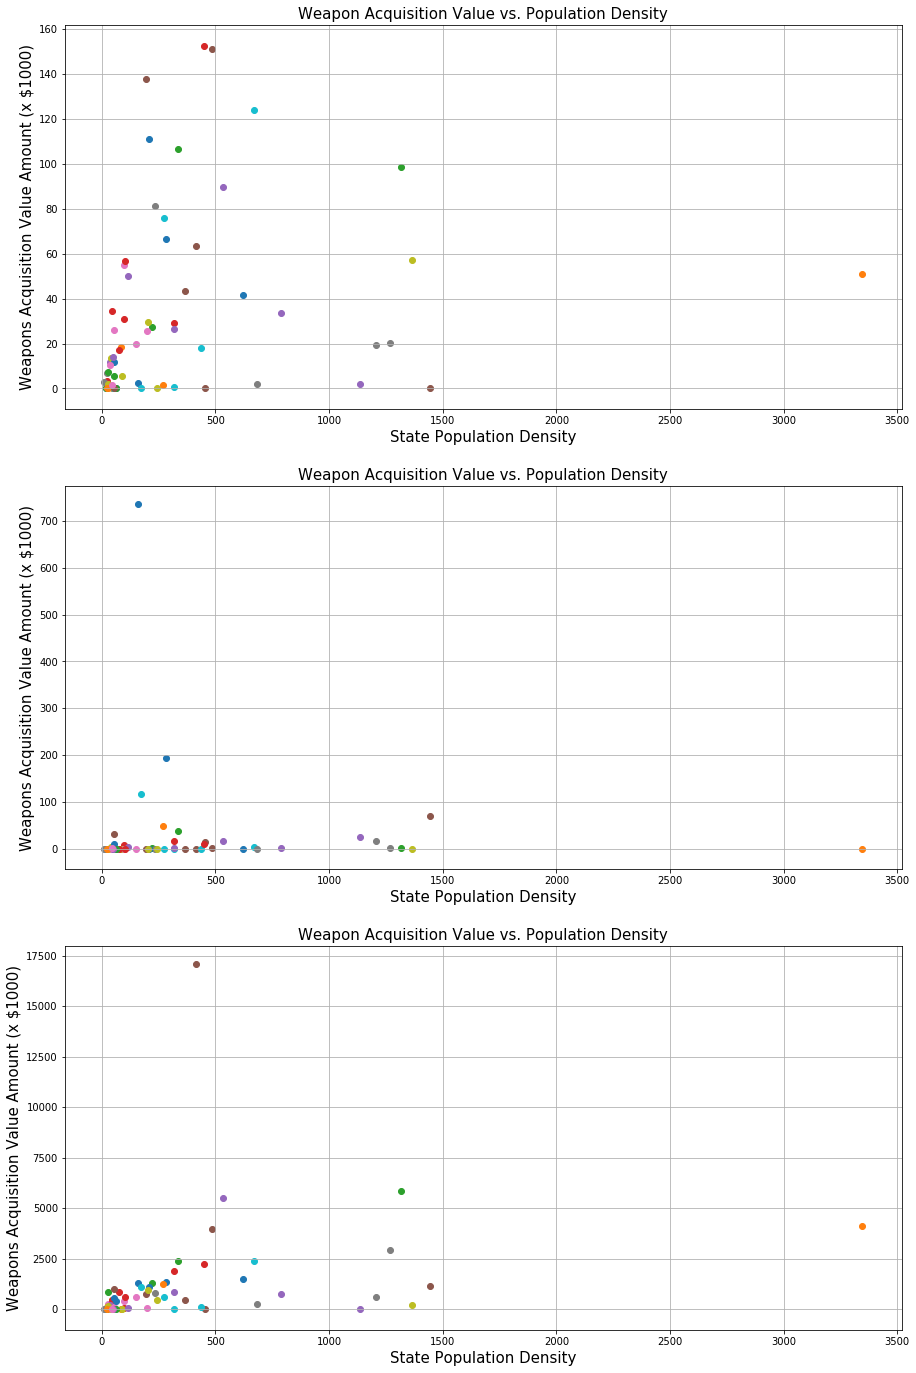

In [30]:
x_data_name = 'Population Density'
fig, ax = plt.subplots(3, 1, figsize=(15,24))
x_data_FL = Florida_county_census[x_data_name]
y_weapons_data_FL = np.array(Florida_county_census['Weapons Purchase Amount'])/1000
y_accessory_data_FL = np.array(Florida_county_census['Tactical Equipment Purchase Amount'])/1000
y_vehicle_data_FL = np.array(Florida_county_census['Vehicle Purchase Amount'])/1000

for x, y, c in zip(x_data_FL, y_weapons_data_FL, Florida_county_census['County']):
    ax[0].scatter(x, y, label = c)
#ax[0].scatter(x_data, y_weapons_data, label = 'Weapons Total Purchase')
#ax[0].set_xscale('log')
ax[0].set_xlabel(x_data_name)
ax[0].set_title('Weapon Acquisition Value vs. Population Density', fontsize = 15)
ax[0].set_xlabel('State Population Density', fontsize = 15)
ax[0].set_ylabel('Weapons Acquisition Value Amount (x $1000)', fontsize = 15)
ax[0].grid()
#ax[0].legend()

for x, y, c in zip(x_data_FL, y_accessory_data_FL, Florida_county_census['County']):
    ax[1].scatter(x, y, label = c)
#ax[1].scatter(x_data, y_accessory_data, label = 'Tactical Equipment Total Purchase')
#ax[1].set_xscale('log')
ax[1].set_xlabel(x_data_name)
ax[1].set_title('Weapon Acquisition Value vs. Population Density', fontsize = 15)
ax[1].set_xlabel('State Population Density', fontsize = 15)
ax[1].set_ylabel('Weapons Acquisition Value Amount (x $1000)', fontsize = 15)
ax[1].grid()
#ax[1].legend()

for x, y, c in zip(x_data_FL, y_vehicle_data_FL, Florida_county_census['County']):
    ax[2].scatter(x, y, label = c)
#ax[2].scatter(x_data, y_vehicle_data, label = 'Vehicle Total Purchase')
#ax[2].set_xscale('log')
ax[2].set_xlabel(x_data_name)
ax[2].set_title('Weapon Acquisition Value vs. Population Density', fontsize = 15)
ax[2].set_xlabel('State Population Density', fontsize = 15)
ax[2].set_ylabel('Weapons Acquisition Value Amount (x $1000)', fontsize = 15)
ax[2].grid()
#ax[2].legend()

In [19]:
county_police_timeline = []
for station in Florida_timeline_purchase_data['Station Name (LEA)']:
    county_police = Flor_police_state_data[Flor_police_state_data['Police Department'] == station]['County']
    county_police_timeline.append(county_police.values[0])

In [20]:
Florida_timeline_purchase_data['County'] = county_police_timeline

In [21]:
Florida_timeline_purchase_data_groupby = Florida_timeline_purchase_data.groupby('County')

In [22]:
county_list = []
x_data = []
y_data = []
for county, county_purchase in Florida_timeline_purchase_data_groupby:
    county_purchase = county_purchase.sort_values(by = 'Ship Date')
    county_list.append(county)
    x_data_temp = county_purchase['Ship Date']
    y_data_temp = county_purchase['Acquisition Value']
    x_data.append(x_data_temp)
    y_data.append(y_data_temp)

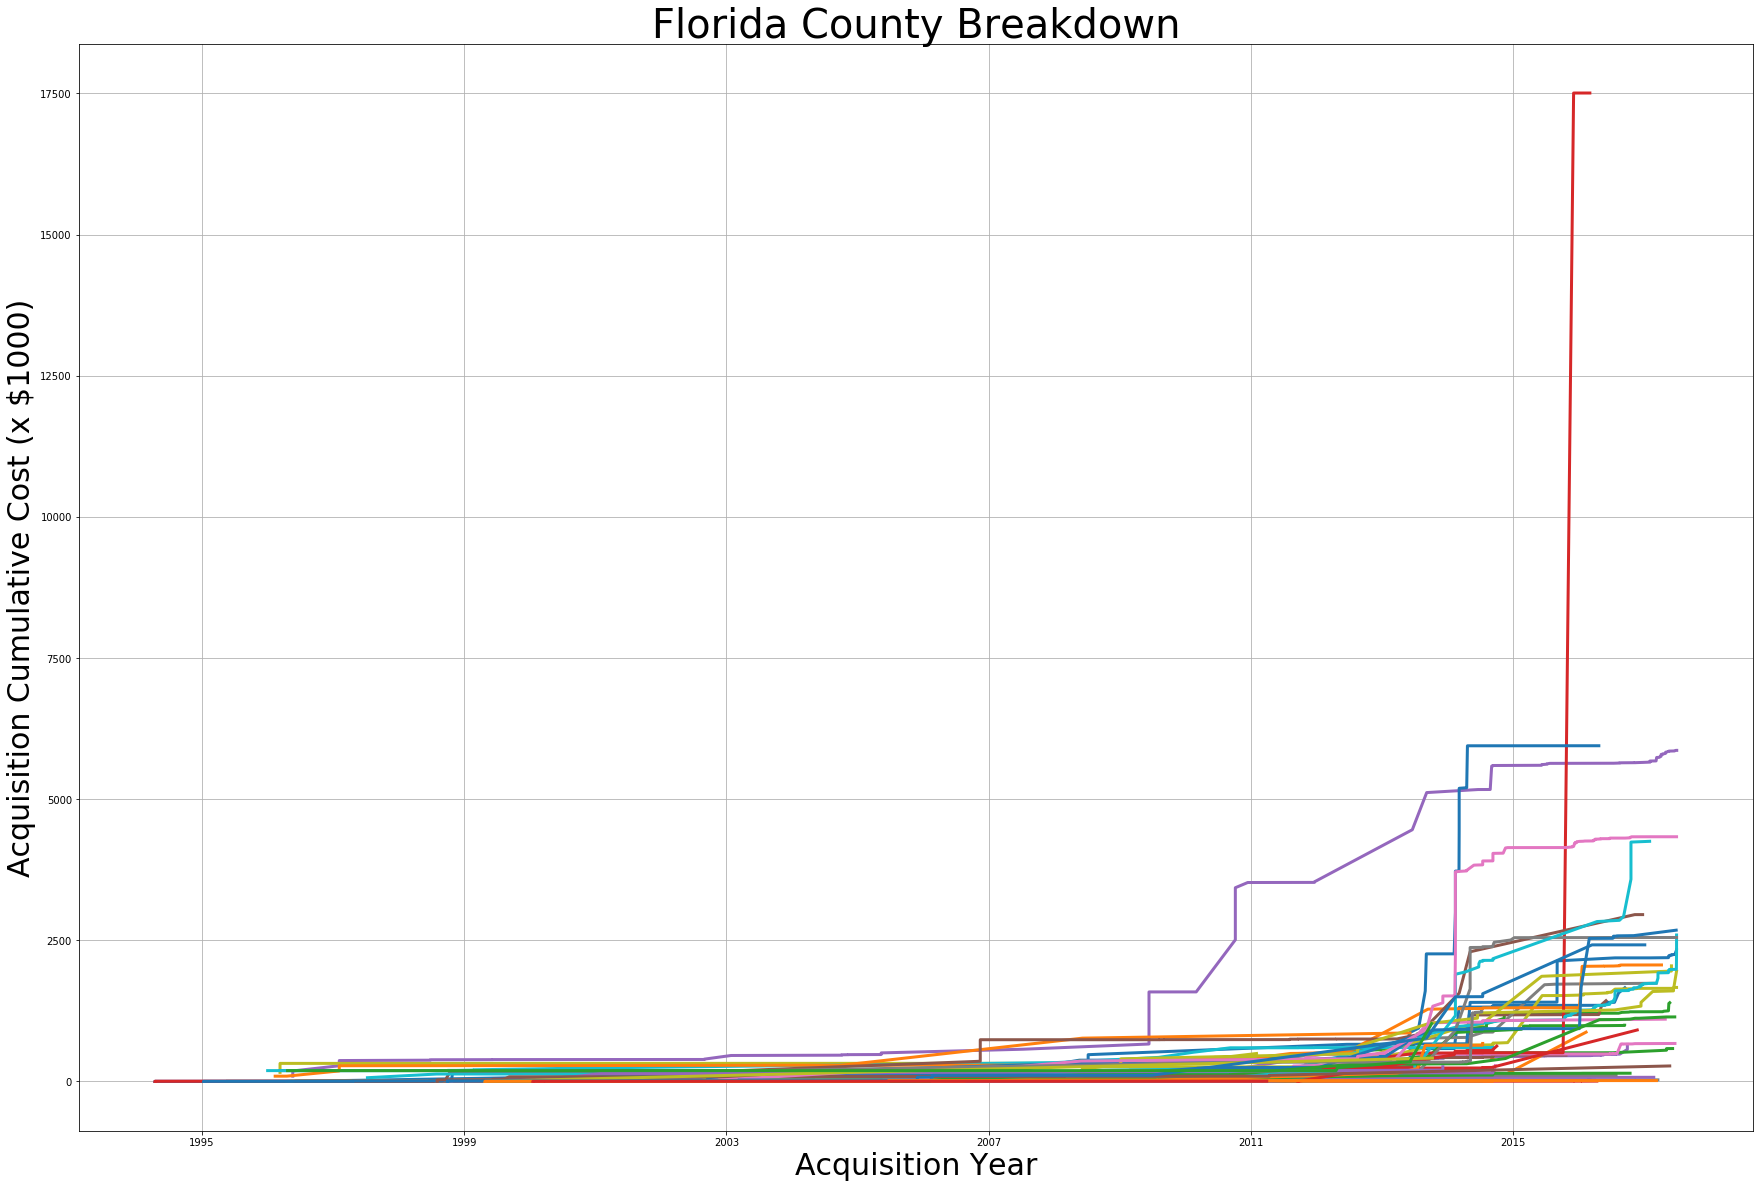

In [23]:
fig, ax = plt.subplots(figsize=(30,20))
for county, x_dat, y_dat in zip(county_list,x_data, y_data):
    ax.plot(x_dat, np.cumsum(y_dat)/1000, label = county, linewidth = 3)

#ax.legend( loc=(0,-1))
ax.set_xlabel('Acquisition Year', fontsize = 30)
ax.set_ylabel('Acquisition Cumulative Cost (x $1000)', fontsize = 30)
ax.set_title('Florida County Breakdown', fontsize = 40)
ax.grid()
plt.show() #Leon County is the high one

# New Jersey

In [24]:
NJ_timeline_purchase_data = pd.read_pickle('../New Jersey.pkl')
NJ_police_state_data = pd.read_excel('Per State Police Department Purchase Combined.xlsx', 'New Jersey')

In [25]:
county_police_timeline = []
for station in NJ_timeline_purchase_data['Station Name (LEA)']:
    county_police = NJ_police_state_data[NJ_police_state_data['Police Department'] == station]['County']
    county_police_timeline.append(county_police.values[0])

In [26]:
NJ_timeline_purchase_data['County'] = county_police_timeline

In [27]:
NJ_timeline_purchase_data_groupby = NJ_timeline_purchase_data.groupby('County')

In [28]:
county_list = []
x_data = []
y_data = []
for county, county_purchase in NJ_timeline_purchase_data_groupby:
    county_purchase = county_purchase.sort_values(by = 'Ship Date')
    county_list.append(county)
    x_data_temp = county_purchase['Ship Date']
    y_data_temp = county_purchase['Acquisition Value']
    x_data.append(x_data_temp)
    y_data.append(y_data_temp)

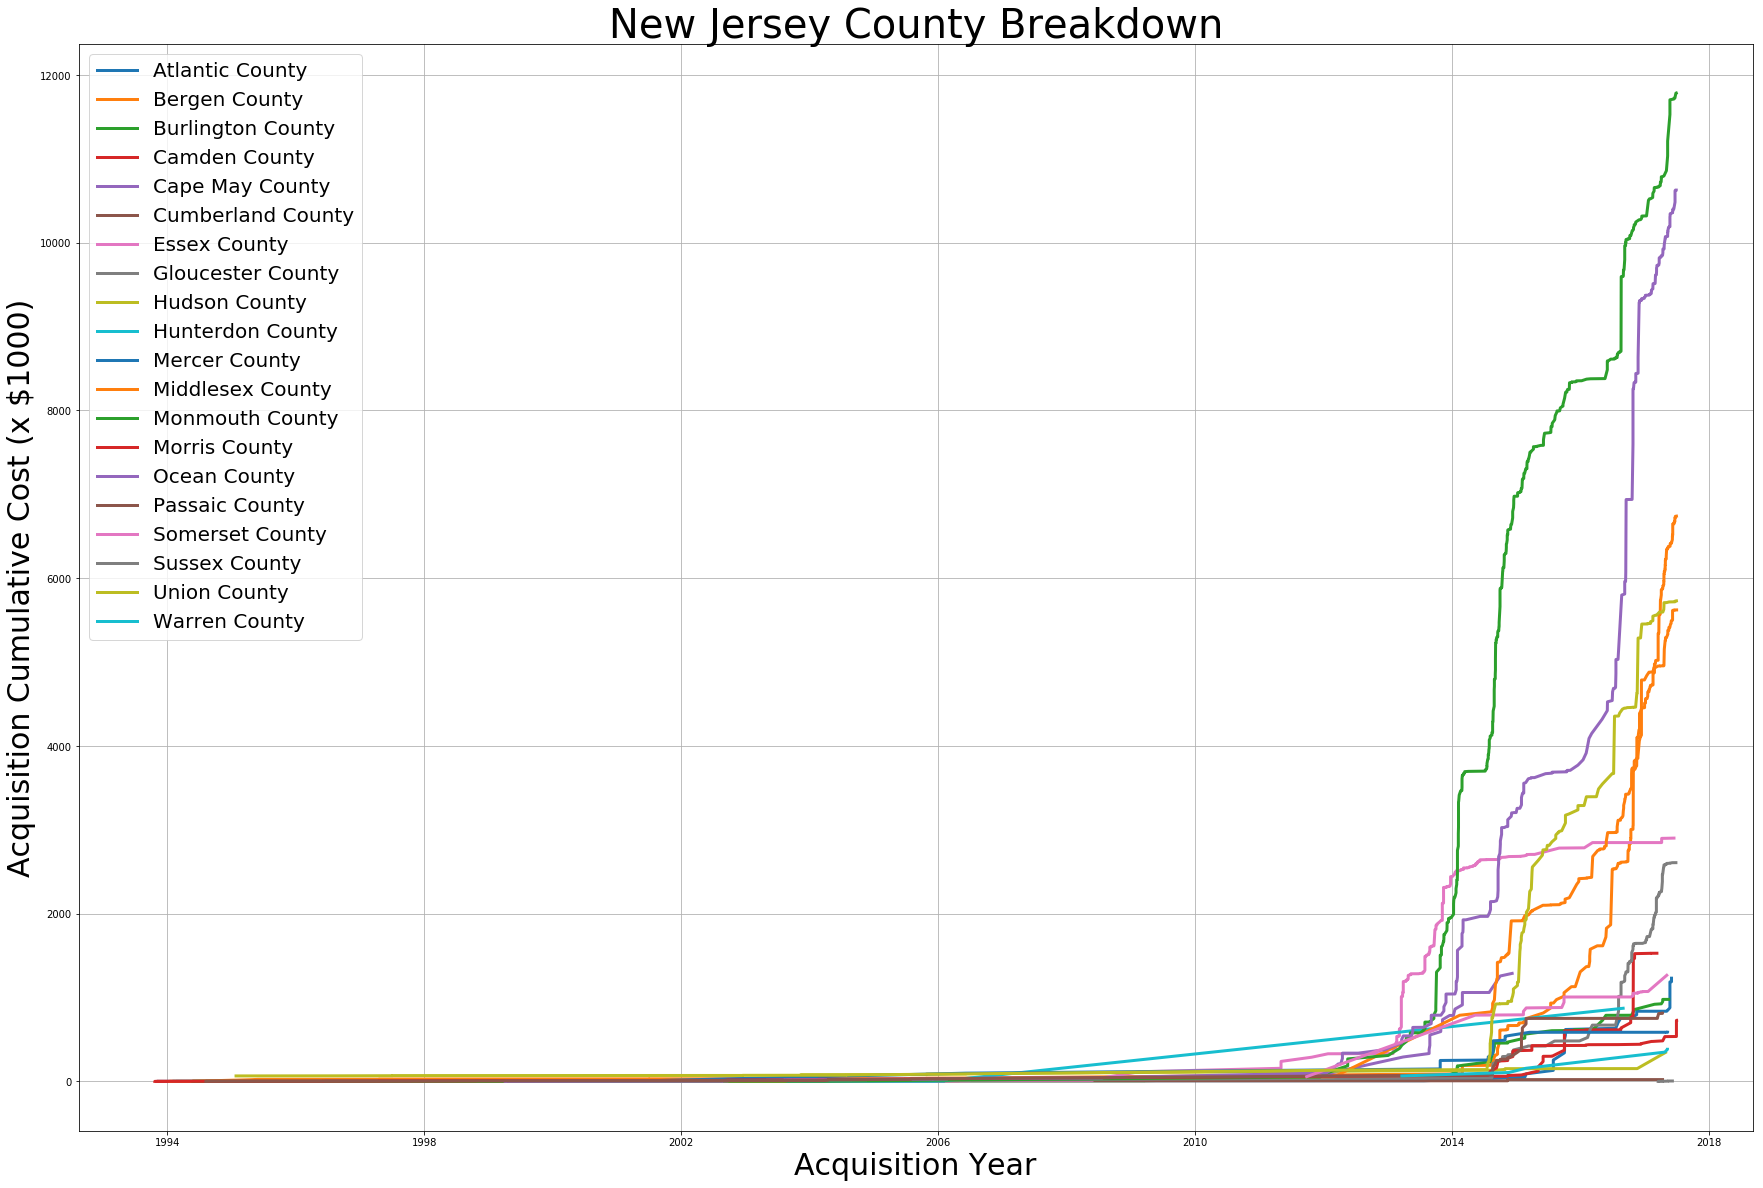

In [29]:
fig, ax = plt.subplots(figsize=(30,20))
for county, x_dat, y_dat in zip(county_list,x_data, y_data):
    ax.plot(x_dat, np.cumsum(y_dat)/1000, label = county, linewidth = 3)

ax.legend(prop={'size': 20})
ax.set_xlabel('Acquisition Year', fontsize = 30)
ax.set_ylabel('Acquisition Cumulative Cost (x $1000)', fontsize = 30)
ax.set_title('New Jersey County Breakdown', fontsize = 40)
ax.grid()
plt.show()